#ข้อ 1A. [รวม 28 คะแนน] สร้าง Pipeline ของการจำแนกประเภทข้อมูล 1A_bank-data.csv


In [ ]:
!pip install ydata-profiling
!pip install summarytools

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 50.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=18827970ef8ed5b895ee80e7630fefeb6a554a8f943eecdcabfc9d31d27af2eb
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import TransformerMixin
from summarytools import dfSummary
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
# /content/1A_bank-data.csv
raw_data = pd.read_csv('/content/1A_bank-data.csv')
raw_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## a. โหลดข้อมูลเป็น DataFrame แล้วแบ่ง Train Test เป็น 80 : 20

In [ ]:
X=raw_data.drop(['y'],axis=1)
y=raw_data['y'].values

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=50)

## b. มี Pipeline ของการเตรียมข้อมูลแบบตัวเลข

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


In [ ]:
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
num_preprocessing=Pipeline(steps=[
    ('missing impute', SimpleImputer(missing_values=np.nan,strategy='median')),
    ('scale', StandardScaler())
])

## c. มี Pipeline ของการเตรียมข้อมูลแบบ categorical

In [ ]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

In [ ]:
cat_preprocessing=Pipeline(steps=[
    ('missing impute', SimpleImputer(missing_values=np.nan,strategy='most_frequent')),
    ('one hot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))
])

## d. มี Pipeline ที่นำแต่ละส่วนมารวมกันแล้วทั้ง ข้อมูลแบบตัวเลข และแบบ categorical

In [ ]:
feature_transform = ColumnTransformer(
    [("num col", num_preprocessing, num_cols),
     ("category col", cat_preprocessing, cat_cols)])

## e. มีการใช้ GridsearchCV ช่วยในการเลือกพารามิเตอร์ที่เหมาะสมของโมเดล
## และ f. มีการทดลองมากกว่า 1 โมเดล


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2'],
    'max_iter': [100, 200, 300]
}
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, scoring='accuracy')

model=Pipeline(steps=[
    ('feature transform', feature_transform),
    ('classification', grid_search)
])

model.fit(X_train, y_train)
print("Best parameters:", model[1].best_params_)

Best parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
model=Pipeline(steps=[
    ('feature transform', feature_transform),
    ('classification', LogisticRegression(C=0.1, max_iter=100, penalty='l2', solver='liblinear'))
])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Classification report:\n", classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      8005
           1       0.65      0.33      0.44      1038

    accuracy                           0.90      9043
   macro avg       0.79      0.65      0.69      9043
weighted avg       0.89      0.90      0.89      9043



In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')

model=Pipeline(steps=[
    ('feature transform', feature_transform),
    ('classification', grid_search)
])

model.fit(X_train, y_train)
print("Best parameters:", model[1].best_params_)

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}


In [ ]:
model=Pipeline(steps=[
    ('feature transform', feature_transform),
    ('classification', DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5, min_samples_leaf=4))
])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Classification report:\n", classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      8005
           1       0.58      0.34      0.43      1038

    accuracy                           0.90      9043
   macro avg       0.75      0.66      0.69      9043
weighted avg       0.88      0.90      0.88      9043



## g. มีการทดลองเพื่อเลือก threshold ที่เหมาะสมนอกเหนือจากการใช้ 0.5 เป็น threshold ได้

In [ ]:
print(label_encoder.classes_)
label_encoder.inverse_transform([0,0,1,1])

['no' 'yes']


array(['no', 'no', 'yes', 'yes'], dtype=object)

In [ ]:
y_test_target=(y_test==0).astype(int)
y_test_target

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
import plotly.express as px
from sklearn.metrics import roc_curve, auc
# หา fpr, tpr
y_prob=model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test_target, y_prob[:,0])

In [ ]:
roc_auc = auc(fpr, tpr)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={roc_auc:.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500,
    hover_data={'Thresholds': thresholds}
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, y0=0, x1=1, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

              precision    recall  f1-score   support

           0       0.36      0.80      0.49      1038
           1       0.97      0.81      0.88      8005

    accuracy                           0.81      9043
   macro avg       0.66      0.81      0.69      9043
weighted avg       0.90      0.81      0.84      9043



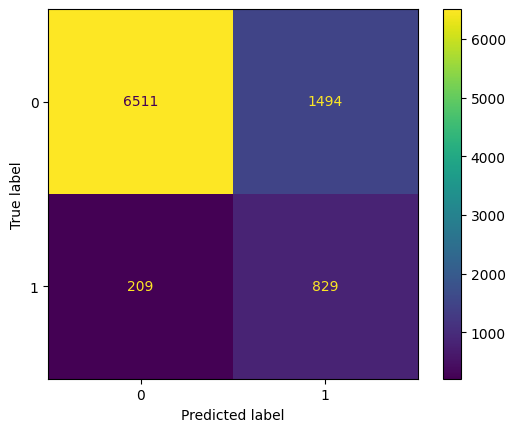

In [ ]:
selected_threshold=0.9097
y_pred=y_prob[:,0]>=selected_threshold
print(classification_report(y_test_target,y_pred))
cm=confusion_matrix(y_test_target,y_pred,labels=[1,0])
ConfusionMatrixDisplay(cm).plot()

# ข้อ 2B. [12 คะแนน] จำแนกประเภทภาพโดยการใช้ CNN model ใน shapes.zip

In [ ]:
!unzip /content/shapes.zip

Archive:  /content/shapes.zip
   creating: shapes/
   creating: shapes/circle/
  inflating: shapes/circle/circle_0.png  
  inflating: shapes/circle/circle_1.png  
  inflating: shapes/circle/circle_10.png  
  inflating: shapes/circle/circle_11.png  
  inflating: shapes/circle/circle_12.png  
  inflating: shapes/circle/circle_13.png  
  inflating: shapes/circle/circle_14.png  
  inflating: shapes/circle/circle_15.png  
  inflating: shapes/circle/circle_16.png  
  inflating: shapes/circle/circle_17.png  
  inflating: shapes/circle/circle_18.png  
  inflating: shapes/circle/circle_19.png  
  inflating: shapes/circle/circle_2.png  
  inflating: shapes/circle/circle_20.png  
  inflating: shapes/circle/circle_21.png  
  inflating: shapes/circle/circle_22.png  
  inflating: shapes/circle/circle_23.png  
  inflating: shapes/circle/circle_24.png  
  inflating: shapes/circle/circle_25.png  
  inflating: shapes/circle/circle_26.png  
  inflating: shapes/circle/circle_27.png  
  inflating: shapes/c

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Subset, DataLoader, Dataset
from torchvision import datasets, transforms
from torchsummary import summary
import os
from PIL import Image

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

num_workers = os.cpu_count()
print(f"num_workers = {num_workers} cores")

Using cuda device
num_workers = 2 cores


In [ ]:
filename = []
label = []
for dirname, _, filenames in os.walk('/content/shapes'):
  for file in filenames:
      f = os.path.join(dirname, file)
      if '.png' in f:
          filename.append(f)
          label.append(dirname.split('/')[-1])
df = pd.DataFrame({'filename':filename, 'label':label})
df.sample(3)

,filename,label
215,/content/shapes/rectangle/rectangle_67.png,rectangle
8,/content/shapes/circle/circle_54.png,circle
298,/content/shapes/rectangle/rectangle_37.png,rectangle


In [ ]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df.sample(3)

,filename,label
216,/content/shapes/rectangle/rectangle_65.png,1
269,/content/shapes/rectangle/rectangle_77.png,1
211,/content/shapes/rectangle/rectangle_15.png,1


In [ ]:
X = df['filename']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
class CustomImageDataset(Dataset):
  def __init__(self, im_filename, y, transform=None):
    self.im_filename = im_filename
    self.y = y
    self.transform = transform

  def __len__(self):
    return self.im_filename.shape[0]

  def __getitem__(self, idx):
    img_path = self.im_filename.iloc[idx]
    image = Image.open(img_path).convert('RGB')
    label = self.y.iloc[idx]

    if self.transform:
        image = self.transform(image)
    image = np.array(image)
    return image, label

## a. สร้าง CNN model ของตัวเอง


In [ ]:
conv = nn.Sequential(
    nn.Conv2d(3, 32,kernel_size=3,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32, 64, kernel_size=3,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(64, 64, kernel_size=3,padding=1),
    nn.ReLU(),
)

conv.to(device)
summary(conv, input_size=(3, 224, 224), device=device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             896
              ReLU-2         [-1, 32, 224, 224]               0
         MaxPool2d-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 64, 112, 112]          18,496
              ReLU-5         [-1, 64, 112, 112]               0
         MaxPool2d-6           [-1, 64, 56, 56]               0
            Conv2d-7           [-1, 64, 56, 56]          36,928
              ReLU-8           [-1, 64, 56, 56]               0
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.57
Forward/backward pass size (MB): 44.41
Params size (MB): 0.21
Estimated Total Size (MB): 45.20
----------------------------------------------------------------


In [ ]:
class CNNModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv = nn.Sequential(
      nn.Conv2d(3, 32,kernel_size=3,padding=1),
      nn.ReLU(),
      nn.MaxPool2d(2),
      nn.Conv2d(32, 64, kernel_size=3,padding=1),
      nn.ReLU(),
      nn.MaxPool2d(2),
      nn.Conv2d(64, 64, kernel_size=3,padding=1),
      nn.ReLU(),
    )
    self.flatten = nn.Flatten()
    self.fc = nn.Sequential(
      nn.Linear(64*56*56, 512),
      nn.ReLU(),
      nn.Linear(512, 128),
      nn.ReLU(),
      nn.Linear(128, 3),
    )

  def forward(self, x):
    x = self.conv(x)
    x = self.flatten(x)
    out = self.fc(x)
    return out

## b. สร้าง Training function เพื่อฝึกโมเดล


In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        X, y = X.to(device), y.to(device).long()
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 5 == 0:
            loss, current = loss.item(), batch * dataloader.batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


In [ ]:
# Testing loop
def test_loop(dataloader, model, loss_fn):
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device).long()
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

## c. ทำการฝึกโมเดลใช้ในการเพื่อจำแนกประเภทภาพ

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
train_dataset = CustomImageDataset(X_train, y_train, transform)
test_dataset = CustomImageDataset(X_test, y_test, test_transform)
im, label = train_dataset.__getitem__(0)
print(label, im.shape)

1 (3, 224, 224)


In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [ ]:
model = CNNModel()
model.to(device)

#Loss function
loss_fn = nn.CrossEntropyLoss()

#Optimizer
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#Epochs
epochs = 25
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 1.102850  [   32/  240]
loss: 0.983275  [  192/  240]
Test Error: 
 Accuracy: 51.7%, Avg loss: 1.049241 

Epoch 2
-------------------------------
loss: 0.945144  [   32/  240]
loss: 0.903585  [  192/  240]
Test Error: 
 Accuracy: 60.0%, Avg loss: 0.809358 

Epoch 3
-------------------------------
loss: 0.781464  [   32/  240]
loss: 0.603006  [  192/  240]
Test Error: 
 Accuracy: 50.0%, Avg loss: 1.013674 

Epoch 4
-------------------------------
loss: 0.552144  [   32/  240]
loss: 0.849399  [  192/  240]
Test Error: 
 Accuracy: 51.7%, Avg loss: 1.005950 

Epoch 5
-------------------------------
loss: 0.450302  [   32/  240]
loss: 0.327981  [  192/  240]
Test Error: 
 Accuracy: 58.3%, Avg loss: 1.071088 

Epoch 6
-------------------------------
loss: 0.306981  [   32/  240]
loss: 0.286681  [  192/  240]
Test Error: 
 Accuracy: 63.3%, Avg loss: 1.256661 

Epoch 7
-------------------------------
loss: 0.288384  [   32/  240]
loss: 0.253032  [ 